# Initialisation

In [1]:
import os
import pandas as pd
# os.chdir("path_toward_the_folder_containing_the_file_"functions")   # To use if needed
import functions as functions
import pickle
import matplotlib.pyplot as plt
pd.set_option("display.max_rows",None,"display.max_columns",None)     # To display the dataframes entirely

# Find the data

In [2]:
# Files

## Source files
data_source='source_files/user_file.xlsx'
data_impacts_source='source_files/impact_file.xlsx'

## Working files

data_impacts_working_file='working_files\impacts.xlsx'
general_working_file='working_files\data.xlsx'
temporary_saving_file=r'working_files\temporary_save_factors.xlsx'

## Results

pickle_file=r'results\pickle'

# Matrices

##Here put the information necessary for the code to be able to identify your matrices

## A matrix
A_1st_column='name of A 1st column (foreground process 1)'
A_last_column='name of A last column (background process 2)'
A_separation_column="name of A last column being a foreground process (foreground process 5)"
A_first_line='name of A first line'
A_last_line='name of A last line'

## Demand matrix

demand_first_line=A_first_line
demand_last_line=A_last_line
demand_first_column='Demand column name'
demand_last_column=demand_first_column

## Bound matrix

bounds_first_line="Name of the line containing the values of the lower boundaries"
bounds_last_line="Name of the line containing the values of the upper boundaries"
bounds_first_column=A_1st_column
bounds_last_column=A_last_column

## Phases matrix
phases_first_line='Name of the first line containing the phases'
phases_last_line='Name of the first line containing the phases'

## Impact matrix

Impacts_first_column=A_1st_column
Impacts_last_column=A_last_column
Impacts_separation_column=A_separation_column
Impacts_IWP_Mid_first_line="IWP Mid | Climate change, long term (kg CO2 eq (long))"
Impacts_IWP_Mid_last_line="IWP Mid | Water scarcity (m3 world-eq)"
Impacts_IWP_End_first_line="IWP End | Ecosystem quality | Climate change, ecosystem quality, long term (PDF.m2.yr)"
Impacts_IWP_End_last_line="IWP End | Human health | Human health total red (DALY)"
Impact_EF_3_0_first_line="EF 3.0 |acidification | accumulated exceedance (ae) (mol H+ eq)"
Impact_EF_3_0_last_line="EF 3.0 | water use, user deprivation potential (deprivation-weighted water consumption) (m3 depriv.)"

# Build the data file

In [3]:
# Searching for the unit impacts of the aggregated processes

#Precise the database you want to use in the variable "database"
       
functions.search_impacts(data_source,
                            data_impacts_source,
                            data_impacts_working_file,
                            Impacts_first_column,
                            Impacts_separation_column,
                            Impacts_last_column,
                            Impacts_IWP_Mid_first_line,
                            Impacts_IWP_Mid_last_line,
                            Impacts_IWP_End_first_line,
                            Impacts_IWP_End_last_line,
                            Impact_EF_3_0_first_line,
                            Impact_EF_3_0_last_line, 
                            database="database 1",         # change to "database 2" if you want to use database 2
                            open_file="n")                 # change to "y" if you want the constructed file to be opened


 Fermer le fichier 

D:\Matières\Double_diplôme_Montreal\CIRAIG\Projet_de_maîtrise\Code\Working_files\impacts.xlsx

 s'il est ouvert. 
 La procédure prend quelques secondes.


In [3]:
# Final data file construction

data=functions.data_initialisation(data_source,
                                      data_impacts_working_file,
                                      general_working_file,
                                      A_1st_column,
                                      A_last_column,
                                      A_first_line,
                                      A_last_line,
                                      demand_first_line,
                                      demand_last_line,
                                      demand_first_column,
                                      demand_last_column,
                                      bounds_first_line,
                                      bounds_last_line,
                                      bounds_first_column,
                                      bounds_last_column, 
                                      phases_first_line,
                                      phases_last_line,
                                      open_file="n")               # change to "y" if you want the constructed file to be opened


Lancer cette fonction après avoir formaté les données d'impacts dans 
D:\Matières\Double_diplôme_Montreal\CIRAIG\Projet_de_maîtrise\Code\Working_files\impacts.xlsx

Fermer le fichier 
D:\Matières\Double_diplôme_Montreal\CIRAIG\Projet_de_maîtrise\Code\Working_files\data.xlsx
s'il est ouvert.



# MOO e-constraint preparing

First select the main objective function and the e-constrained objective function (for now only two objectives)

In [4]:
# Read objective functions
## The objective function has to be selected in the main file by "X" in the column "Selected scenarios". Be careful it is a big X, little x will not work.
list_objective_functions=functions.objective_choice(data_source)
list_objective_functions

['IWP Mid | Climate change, short term (kg CO2 eq (short))',
 'IWP Mid | Fossil and nuclear energy use (MJ deprived)',
 'IWP End | Ecosystem quality | Ecosystem quality total red (PDF.m2.yr)',
 'IWP End | Human health | Human health total red (DALY)']

In [46]:
#Among them, select the main objective function

obj_function_number=int(input("Impact chosen to be the main objective \n"))
obj_function=list_objective_functions[obj_function_number]

#Among them, select the constrained objective

e_constraint_function_number=int(input("Impact chosen to be the e-constraint \n"))
e_constraint_function=list_objective_functions[e_constraint_function_number]

list_objective_functions_moo=[]
list_objective_functions_moo.append(obj_function)
list_objective_functions_moo.append(e_constraint_function)

print("The main objective function is")
print(list_objective_functions_moo[0])
print("\n")
print("The e-constrained functions are")
for i in range(1,len(list_objective_functions_moo)):
    print(list_objective_functions_moo[i])

Impact chosen to be the main objective 
3
Impact chosen to be the e-constraint 
1
The main objective function is
IWP End | Human health | Human health total red (DALY)


The e-constrained functions are
IWP Mid | Fossil and nuclear energy use (MJ deprived)


Optimize the main obj and the e constrained obj functions to get the maximum and minimum values in the range (for now only two objectives available)

In [47]:
# To obtain the max (nadir_f) and the min (ideal_f)

norm_fact_df=functions.optimisation_to_norm(data,list_objective_functions_moo)
norm_fact_df

IWP Mid | Fossil and nuclear energy use (MJ deprived) has been optimized successfully
IWP End | Human health | Human health total red (DALY) has been optimized successfully
Normalization factors calculated !


,ideal_f,nadir_f
IWP End | Human health | Human health total red (DALY),58350.836187,59441.90225
IWP Mid | Fossil and nuclear energy use (MJ deprived),972314553911.114502,983933866258.938843


In [48]:
# To get the e-constraints values

min_value=norm_fact_df.iloc[1,0]
max_value=norm_fact_df.iloc[1,1]

list_of_e_constraint_values=[]
points_number=50

for i in range (points_number):
    list_of_e_constraint_values.append(min_value+((max_value-min_value)/points_number)*i)

list_of_e_constraint_values

[972314553911.1145,
 972546940158.071,
 972779326405.0275,
 973011712651.984,
 973244098898.9404,
 973476485145.897,
 973708871392.8534,
 973941257639.8099,
 974173643886.7664,
 974406030133.7229,
 974638416380.6793,
 974870802627.6359,
 975103188874.5923,
 975335575121.5488,
 975567961368.5054,
 975800347615.4618,
 976032733862.4183,
 976265120109.3748,
 976497506356.3313,
 976729892603.2877,
 976962278850.2443,
 977194665097.2007,
 977427051344.1572,
 977659437591.1136,
 977891823838.0702,
 978124210085.0266,
 978356596331.9832,
 978588982578.9397,
 978821368825.8961,
 979053755072.8527,
 979286141319.8091,
 979518527566.7656,
 979750913813.722,
 979983300060.6786,
 980215686307.635,
 980448072554.5916,
 980680458801.548,
 980912845048.5045,
 981145231295.461,
 981377617542.4175,
 981610003789.374,
 981842390036.3304,
 982074776283.287,
 982307162530.2434,
 982539548777.2,
 982771935024.1564,
 983004321271.1129,
 983236707518.0693,
 983469093765.0259,
 983701480011.9823]

In [49]:
# Optimize the objective functions
# Return a list of scenario_class variable containing information about each scenario, factors and impacts

opt_resultats=functions.optimisation_e_constraint(data,list_objective_functions_moo,list_of_e_constraint_values,temporary_saving_file,open_file="n")

L'optimisation totale prend quelques secondes
opt. 972314553911.1145 has been optimized successfully
opt. 972546940158.071 has been optimized successfully
opt. 972779326405.0275 has been optimized successfully
opt. 973011712651.984 has been optimized successfully
opt. 973244098898.9404 has been optimized successfully
opt. 973476485145.897 has been optimized successfully
opt. 973708871392.8534 has been optimized successfully
opt. 973941257639.8099 has been optimized successfully
opt. 974173643886.7664 has been optimized successfully
opt. 974406030133.7229 has been optimized successfully
opt. 974638416380.6793 has been optimized successfully
opt. 974870802627.6359 has been optimized successfully
opt. 975103188874.5923 has been optimized successfully
opt. 975335575121.5488 has been optimized successfully
opt. 975567961368.5054 has been optimized successfully
opt. 975800347615.4618 has been optimized successfully
opt. 976032733862.4183 has been optimized successfully
opt. 976265120109.3748

# Pareto graph

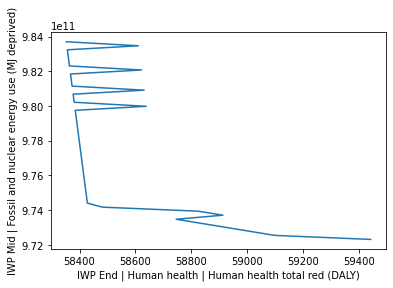

In [50]:
#Get the values for your graphs

values_obj_1=[]
values_obj_2=[]

for i in range (len(opt_resultats)):
    for j in range(len(opt_resultats[i].impacts)):
        if opt_resultats[i].impacts[j].name==list_objective_functions_moo[0]:
            values_obj_1.append(opt_resultats[i].impacts[j].valeur_totale)
        if opt_resultats[i].impacts[j].name==list_objective_functions_moo[1]:
            values_obj_2.append(opt_resultats[i].impacts[j].valeur_totale)

# Print the graph

plt.plot(values_obj_1, values_obj_2)
plt.xlabel(list_objective_functions_moo[0])
plt.ylabel(list_objective_functions_moo[1])
plt.show()            

# Data storage and retrieving into pickle files

At each optimisation, you can store the calculated scenarios in a pikle file to then re use them

## Data storage

In [37]:
# Save the precedent results into pickle form

with open(pickle_file,"wb") as output_file :
    pickle.dump(opt_resultats, output_file)
